In [2]:
import glob, os

folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'
matls = ['greentea', 'moli', 'wulong', 'water', 'vinegar', 'milk', 'oil', 'liquor', 'yogurt', 'colanosugar', 'cola']

## 都是50
for d in [1, 6, 7, 8, 9]:
    for matl in matls:
        df_f = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
        df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' %(d, matl)))
        if len(df_f) != 50 or len(df_t) != 50:
            print(d, matl)

## 都是50
for file in glob.glob(os.path.join(folder_clean, '*.csv')):
    df = pd.read_csv(file)
    if len(df) != 50:
        print(file, len(df))

D:\Atom\python\data\cleaned\grill\final\d11_water_r1_f_kde.csv 0
D:\Atom\python\data\cleaned\grill\final\d11_water_r1_t_kde.csv 0


In [7]:
label = {'greentea': 4, 'moli': 5, 'wulong': 6, 'water': 3, 'vinegar': 2, 'milk': 7, 'oil': 1, 'liquor': 8, 'yogurt': 9, 'colanosugar': 10, 'cola': 11, 'empty': 12}

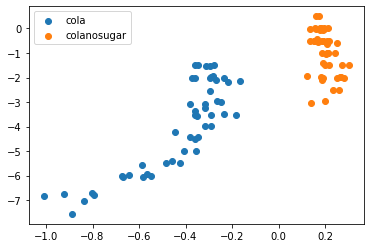

In [3]:
# matls = ['water', 'vinegar', 'milk', 'oil', 'liquor', 'yogurt']
# matls = ['water', 'vinegar', 'milk', 'oil', 'liquor', 'yogurt']
# matls = ['greentea', 'moli', 'wulong', 'water', 'vinegar', 'milk', 'oil', 'liquor', 'yogurt', 'colanosugar', 'cola']
matls = ['cola', 'colanosugar']
d_p = []
d_r = []
f = []
y = []
colors =['red','green',"blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"]
for matl in matls:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd1_%s_f_kde.csv' % (matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd1_%s_t_kde.csv' %(matl)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    
    d_p.extend(diff_p)
    d_r.extend(diff_r)
    f.extend(df_f['CHANNEL'].values)
    y.extend(np.repeat([matl], len(diff_p)))
    plt.scatter(diff_p, diff_r)
    
#     for i in range(len(diff_p)):
#         if diff_p[i] < 0:
#             diff_p[i] += 2*np.pi
#         else:
#             diff_p[i] -= 2*np.pi
            
#     d_p.extend(diff_p)
#     d_r.extend(diff_r)
#     f.extend(df_f['CHANNEL'].values)
#     y.extend(np.repeat([matl], len(diff_p)))
#     plt.scatter(d_p, d_r)
plt.legend(matls)
X = np.column_stack((d_p, d_r))

# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()
# model.fit(X, y)

# from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier().fit(X, y)
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)


import pickle
pickle.dump(clf, open('model_cola.joblib', 'wb'))

In [182]:
def plot_svc_decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    
    # create grid to evaluate model
    x = np.linspace(-7, 7, 30)
    y = np.linspace(-8, 8, 30)
    Y, X = np.meshgrid(y, x)
    print(X.shape)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    print(xy.shape)
    print(model.decision_function(xy).shape)
    colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
    
    for i in range(6):
        P = model.decision_function(xy)[:,i].reshape(X.shape)

        # plot decision boundary and margins
        ax.contour(X, Y, P, colors=colors[i],
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1]);
#     ax.set_xlim(xlim)
#     ax.set_ylim(ylim)

(30, 30)
(900, 2)
(900, 11)


<ipython-input-182-ad974b526bb3>:20: UserWarning: No contour levels were found within the data range.
  ax.contour(X, Y, P, colors=colors[i],
<ipython-input-182-ad974b526bb3>:20: UserWarning: No contour levels were found within the data range.
  ax.contour(X, Y, P, colors=colors[i],
<ipython-input-182-ad974b526bb3>:20: UserWarning: No contour levels were found within the data range.
  ax.contour(X, Y, P, colors=colors[i],


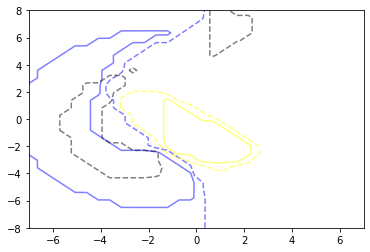

In [183]:
plot_svc_decision_function(clf)

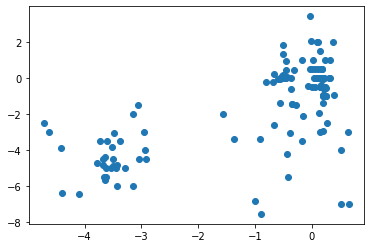

In [184]:
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1])

(40, 2) (40,)
(40, 2) (40,)


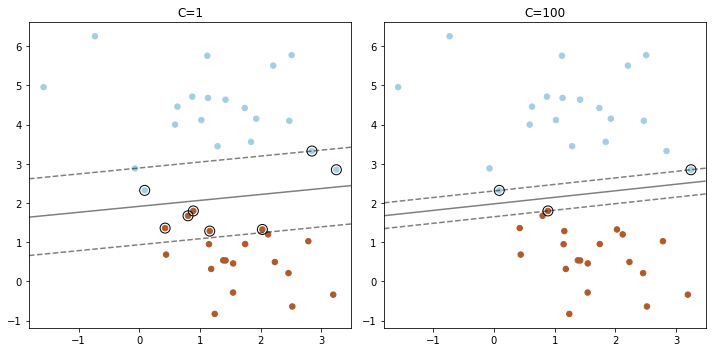

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    print(X.shape, decision_function.shape)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

greentea ['greentea' 'greentea' 'greentea' 'greentea' 'greentea' 'greentea'
 'greentea' 'greentea' 'greentea' 'greentea' 'greentea' 'greentea'
 'greentea' 'greentea' 'greentea' 'greentea' 'greentea' 'greentea'
 'greentea' 'greentea' 'greentea' 'greentea' 'greentea' 'greentea'
 'greentea' 'greentea' 'greentea' 'greentea' 'greentea' 'greentea'
 'greentea' 'greentea' 'greentea' 'greentea' 'greentea' 'greentea'
 'greentea' 'greentea' 'greentea' 'greentea' 'greentea' 'greentea'
 'greentea' 'greentea' 'greentea' 'greentea' 'greentea' 'greentea'
 'greentea' 'greentea']
Correct 1.0
-------------------------------
moli ['moli' 'moli' 'moli' 'moli' 'moli' 'moli' 'moli' 'moli' 'moli' 'moli'
 'moli' 'moli' 'moli' 'colanosugar' 'moli' 'moli' 'moli' 'moli' 'moli'
 'colanosugar' 'moli' 'moli' 'moli' 'moli' 'moli' 'moli' 'colanosugar'
 'moli' 'moli' 'colanosugar' 'moli' 'moli' 'moli' 'moli' 'moli' 'moli'
 'moli' 'colanosugar' 'colanosugar' 'moli' 'moli' 'moli' 'colanosugar'
 'colanosugar' 'moli' 'cola

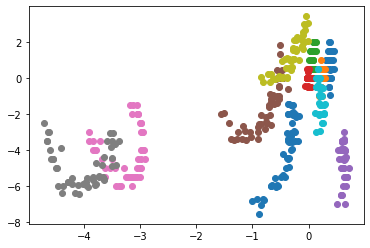

In [191]:
cnt = 0
correctcnt = 0
for matl in matls:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd1_%s_f_kde.csv' % (matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd1_%s_t_kde.csv' %(matl)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    plt.scatter(diff_p, diff_r)
#     result = tree.predict(np.column_stack((diff_p, diff_r, df_t['CHANNEL'])))
    result = clf.predict(np.column_stack((diff_p, diff_r)))
    print(matl, result)
    correct = (result==matl).sum()
    print('Correct', correct/len(df_f))
    cnt += len(df_f)
    correctcnt += correct
    print('-------------------------------')
print(correctcnt, cnt, correctcnt/cnt)